**Objetivo:** Extrair as principais informações sobre a base de dados

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow

%matplotlib inline

from PIL import Image

In [ ]:
PATH = '/content/gdrive/Shareddrives/IA901 - Projeto Final/Datasets/Interim/'

In [ ]:
# Get number of images

count = 0
# Iterate directory
for path in os.listdir(PATH+'Images'):
    # check if current path is a file
    if os.path.isfile(os.path.join(PATH+'Images', path)):
        count += 1
print('Number of Images:', count)

KeyboardInterrupt: ignored

In [ ]:

img = cv2.imread(PATH+'Images/Image_100.png')

# All Image Properties
print("Shape of Image:", img.shape)
print('Total Number of pixels:', img.size)
print("Image data type:", img.dtype)
print("Dimension:", img.ndim)

Shape of Image: (256, 256, 3)
Total Number of pixels: 196608
Image data type: uint8
Dimension: 3


# Estudo da distribuição da classe

In [ ]:
#Proporção de classes e tipos de tecido
ClassTypes = pd.read_csv(PATH+"ClassAndTypes.csv")
ClassTypes['Class'].describe()

count    7901.000000
mean        0.530439
std         0.499104
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Class, dtype: float64

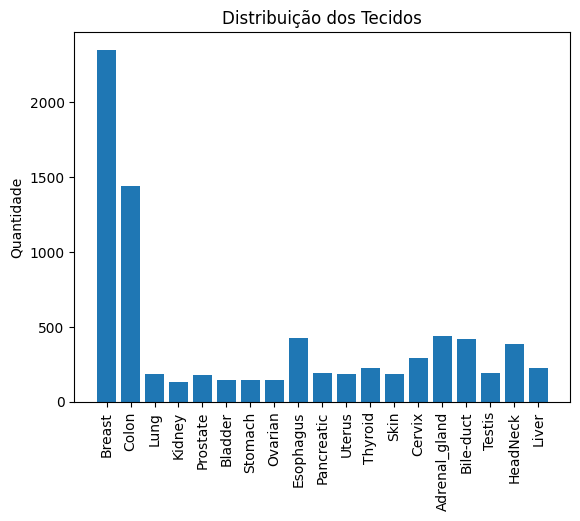

Counter({'Breast': 2351,
         'Colon': 1440,
         'Lung': 184,
         'Kidney': 134,
         'Prostate': 182,
         'Bladder': 146,
         'Stomach': 146,
         'Ovarian': 146,
         'Esophagus': 424,
         'Pancreatic': 195,
         'Uterus': 186,
         'Thyroid': 226,
         'Skin': 187,
         'Cervix': 293,
         'Adrenal_gland': 437,
         'Bile-duct': 420,
         'Testis': 196,
         'HeadNeck': 384,
         'Liver': 224})

In [ ]:
# Conta o numero de categorias das variaveis
from collections import Counter
# Counter(ClassTypes['Types'])

counter_obj = Counter(ClassTypes['Types'])

# Extract the unique elements and their counts from the Counter object
elements = counter_obj.keys()
counts = counter_obj.values()

# Create a bar plot
plt.bar(elements, counts)

# Add labels and title
plt.xlabel('')
plt.ylabel('Quantidade')
plt.title('Distribuição dos Tecidos')

plt.xticks(rotation='vertical')


# Show the plot
plt.show()

Counter(ClassTypes['Types'])

In [ ]:
# Para tecidos sem celulas neoplasicas
Counter(ClassTypes[ClassTypes.Class==0]['Types'])

Counter({'Breast': 878,
         'Colon': 1111,
         'Stomach': 48,
         'Ovarian': 52,
         'Esophagus': 172,
         'Lung': 8,
         'Uterus': 56,
         'Thyroid': 144,
         'Skin': 80,
         'Cervix': 132,
         'Adrenal_gland': 115,
         'Pancreatic': 133,
         'Bile-duct': 171,
         'Testis': 99,
         'Bladder': 80,
         'HeadNeck': 223,
         'Kidney': 49,
         'Liver': 102,
         'Prostate': 57})

In [ ]:
# Para tecidos com celulas neoplasicas
Counter(ClassTypes[ClassTypes.Class==1]['Types'])

Counter({'Breast': 1473,
         'Colon': 329,
         'Lung': 176,
         'Kidney': 85,
         'Prostate': 125,
         'Bladder': 66,
         'Ovarian': 94,
         'Esophagus': 252,
         'Pancreatic': 62,
         'Thyroid': 82,
         'Skin': 107,
         'Adrenal_gland': 322,
         'Cervix': 161,
         'Bile-duct': 249,
         'Testis': 97,
         'HeadNeck': 161,
         'Liver': 122,
         'Stomach': 98,
         'Uterus': 130})

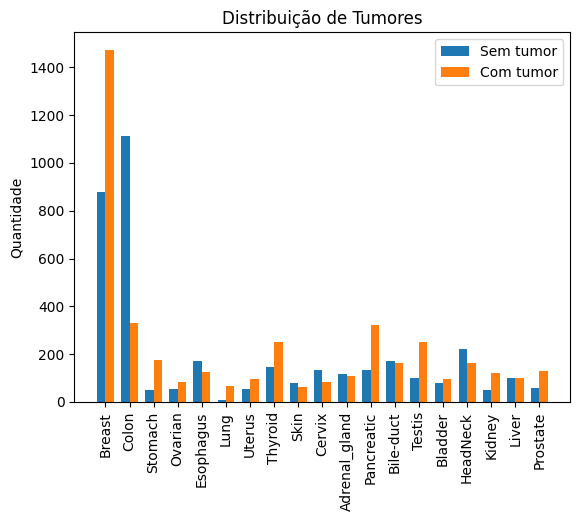

In [ ]:
counter_obj1 = Counter(ClassTypes[ClassTypes.Class==0]['Types'])
counter_obj2 = Counter(ClassTypes[ClassTypes.Class==1]['Types'])

# Extract the unique elements and their counts from the Counter object
elements = counter_obj1.keys()
counts1 = counter_obj1.values()
counts2 = counter_obj2.values()

# Set the width for each bar
bar_width = 0.35

# Set the positions of the bars
position1 = np.arange(len(elements))
position2 = position1 + bar_width

# Create a bar plot
plt.bar(position1 , counts1, width=bar_width, label = 'Sem tumor')
plt.bar(position2, counts2, width=bar_width, label = 'Com tumor')


# Add labels and title
plt.xlabel('')
plt.ylabel('Quantidade')
plt.title('Distribuição de Tumores')

# plt.xticks(rotation='vertical')

plt.xticks(position1 + bar_width / 2, elements, rotation='vertical')

# Show the plot
plt.legend()
plt.show()

# Plot de diferentes exemplos de cada tecido

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Path to the directory with PNG images
image_dir = PATH+"Images"

# Path to the CSV file containing image information
csv_file = PATH

# Load the CSV file
df = pd.read_csv(PATH+"ClassAndTypes.csv")

# Get unique tissue types and categories
tissue_types = df['Types'].unique()
categories = df['Class'].unique()

# Create a grid plot
num_tissue_types = len(tissue_types)
num_categories = len(categories)
width = 8
fig, axes = plt.subplots(num_tissue_types, num_categories, figsize=(width,width*num_tissue_types/num_categories))

# Iterate over tissue types and categories
for i, tissue_type in enumerate(tissue_types):
    for j, category in enumerate(categories):
        # Filter images for the current tissue type and category
        filtered_df = df[(df['Types'] == tissue_type) & (df['Class'] == category)]
        
        # Get the first image path from the filtered dataframe
        image_path = os.path.join(image_dir, "Image_"+str(filtered_df.index.values[0]) + '.png')
        print("\n tissue_type: ", tissue_type)
        print("\n Category: ", category)
        print("\n Image Index: ", filtered_df.index.values[0])
        # Load and plot the image
        image = plt.imread(image_path)
        axes[i, j].imshow(image)
        axes[i, j].set_title(f'Tissue: {tissue_type}\nCategory: {category}')
        axes[i, j].axis('off')

# Show the plot
plt.savefig(PATH+"ImagesExamples.png")
plt.show()



Output hidden; open in https://colab.research.google.com to view.